In [1]:
!python -m pip install multiple-hypothesis-testing


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [3]:
from Higher_Criticism import Higher_Criticism
from Higher_Analysis import confusion_matrix_from_random_values
from Synthetic_Data_Generators import Multi_Class_Normal_Population as Data_Generator
from Synthetic_Data_Generators import Two_Lists_Tuple


In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'


In [5]:
N=30000
monte_carlo = 1000
chunk_size = 100
beta_range = [0.7]
r_range=list(np.arange(0.05,0.25,0.05))
gamma_range = list(np.arange(0.1,1.0,0.2))



In [6]:
params_list = Two_Lists_Tuple(r_range, beta_range)
signal_generators = [Data_Generator(**Data_Generator.params_from_N_r_beta(N=N, r=r, beta=beta)) for r, beta in params_list]
hc_models = [Higher_Criticism(work_mode='bonferroni', alpha=0.05), Higher_Criticism(work_mode='bh', alpha=0.05), Higher_Criticism(work_mode='bh', alpha=0.01)]
hc_models += [Higher_Criticism(work_mode='hc', global_max=True, gamma=gamma) for gamma in gamma_range]


In [7]:

confusion_matrices = confusion_matrix_from_random_values(\
    hc_models=hc_models, signal_generators=signal_generators,\
    monte_carlo=monte_carlo, chunk_size=chunk_size)


100%|██████████| 10/10 [00:25<00:00,  2.58s/it]


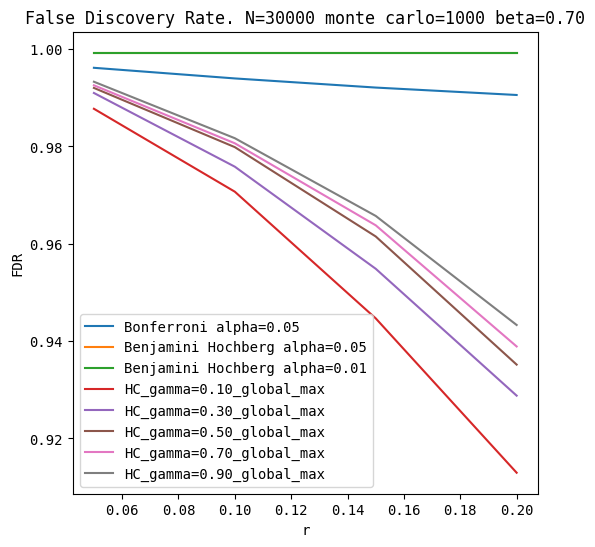

In [8]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'False Discovery Rate. N={N} monte carlo={monte_carlo} beta={beta_range[0]:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    fdr = []
    for conf_matrices in confusion_matrices[ind_model]:
        true_positive = conf_matrices[:,0]
        false_positive = conf_matrices[:,1]
        true_negative = conf_matrices[:,2]
        false_negative = conf_matrices[:,3]
        fdr.append(np.mean(false_positive/np.maximum(false_positive+true_positive,1)))
    ax.plot(r_range, fdr, label=str(hc_model))
ax.set_xlabel('r')
ax.set_ylabel('FDR')
ax.legend()
plt.show()



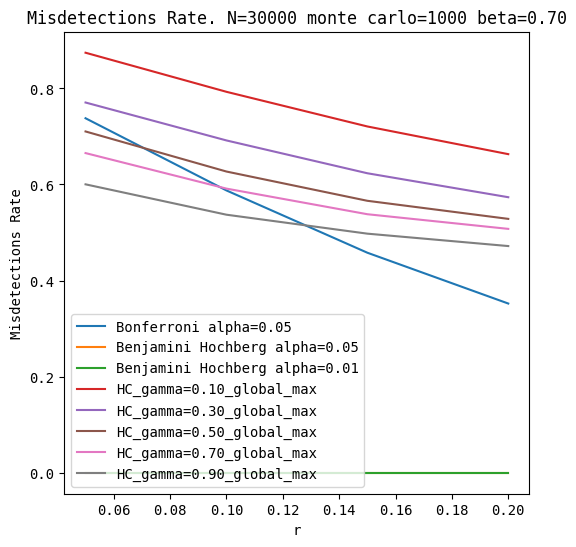

In [9]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'Misdetections Rate. N={N} monte carlo={monte_carlo} beta={beta_range[0]:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    mdr = []
    for conf_matrices in confusion_matrices[ind_model]:
        true_positive = conf_matrices[:,0]
        false_positive = conf_matrices[:,1]
        true_negative = conf_matrices[:,2]
        false_negative = conf_matrices[:,3]
        mdr.append(np.mean(false_negative/np.maximum(false_negative+true_positive,1)))
    ax.plot(r_range, mdr, label=str(hc_model))
ax.set_xlabel('r')
ax.set_ylabel('Misdetections Rate')
ax.legend()
plt.show()



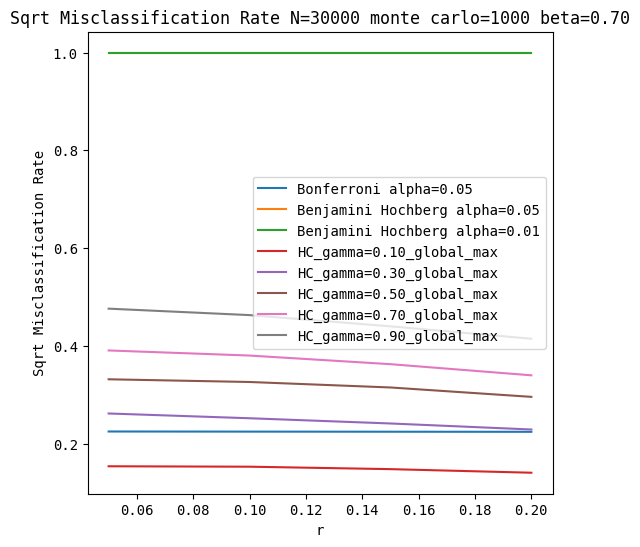

In [10]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'Sqrt Misclassification Rate N={N} monte carlo={monte_carlo} beta={beta_range[0]:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    mcr = []
    for conf_matrices in confusion_matrices[ind_model]:
        true_positive = conf_matrices[:,0]
        false_positive = conf_matrices[:,1]
        true_negative = conf_matrices[:,2]
        false_negative = conf_matrices[:,3]
        mcr.append(np.mean((false_negative+false_positive)/N)**0.5)
    ax.plot(r_range, mcr, label=str(hc_model))
ax.set_xlabel('r')
ax.set_ylabel('Sqrt Misclassification Rate')
ax.legend()
plt.show()

